In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import read_mist_models

In [2]:
isocmd = read_mist_models.ISOCMD('MIST_iso_604a1d34154e3.iso.cmd')

print ('version: ', isocmd.version)
print ('photometric system: ', isocmd.photo_sys)
print ('abundances: ', isocmd.abun)
print ('rotation: ', isocmd.rot)
print ('ages: ', [round(x,2) for x in isocmd.ages])
print ('number of ages: ', isocmd.num_ages)
print ('available columns: ', isocmd.hdr_list)
print ('Av extinction: ', isocmd.Av_extinction)

Reading in: MIST_iso_604a1d34154e3.iso.cmd
version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  SDSS (AB)
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'SDSS_u', 'SDSS_g', 'SDSS_r',

In [3]:
#Cluster directories:
M35_dir = 'M35'
# M67_dir = 'M67'
# M67v2_dir = 'M67v2'
# NGC869_dir = 'NGC869'

#Setting Cluster to process
cluster_dir = M35_dir #################################################################################

#Output directories to shared and local folders
shared_dir = os.path.join('/data/observatory/student_data/William_ODonnell', cluster_dir)
local_dir = cluster_dir

In [4]:
Final_df = pd.read_csv(os.path.join(local_dir, "4. " + cluster_dir + '_Final_Corrected_Mags.csv')) 
Magnitudes = Final_df.values
G_mag = Magnitudes[0:,4]
G_mag_err = Magnitudes[0:,5]
I_mag = Magnitudes[0:,6]
I_mag_err = Magnitudes[0:,7]
R_mag = Magnitudes[0:,8]
R_mag_err = Magnitudes[0:,9]

G_R = G_mag - R_mag
R_I = R_mag - I_mag
G_I = G_mag - I_mag

I_R = I_mag - R_mag

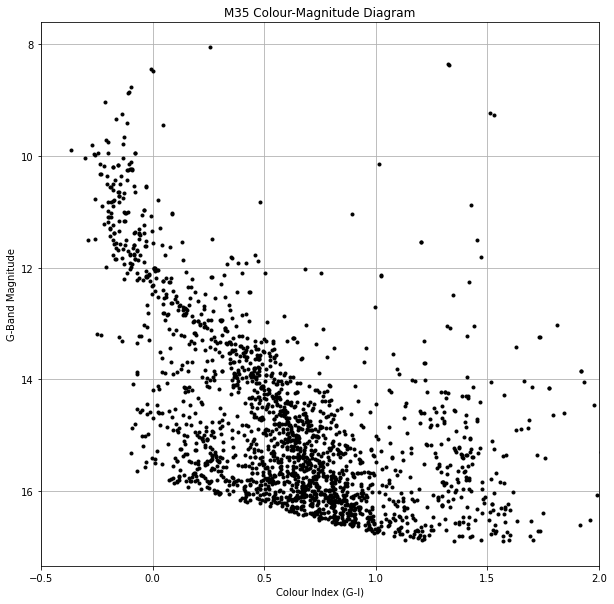

In [6]:
plt.figure(figsize=(10, 10))
plt.plot(G_I, G_mag, ".", color = "Black")
plt.xlim(left = -0.5)
plt.xlim(right = 2)
plt.xlabel("Colour Index (G-I)")
plt.ylabel("G-Band Magnitude")
plt.gca().invert_yaxis()
plt.title(cluster_dir+ " " + "Colour-Magnitude Diagram")
#plt.legend()
plt.grid()

Age of Cluster (Gyr): 0.09772372209558111
Distance (pc): 1096.4781961431852
Reddening(g' - i') is: 0.27


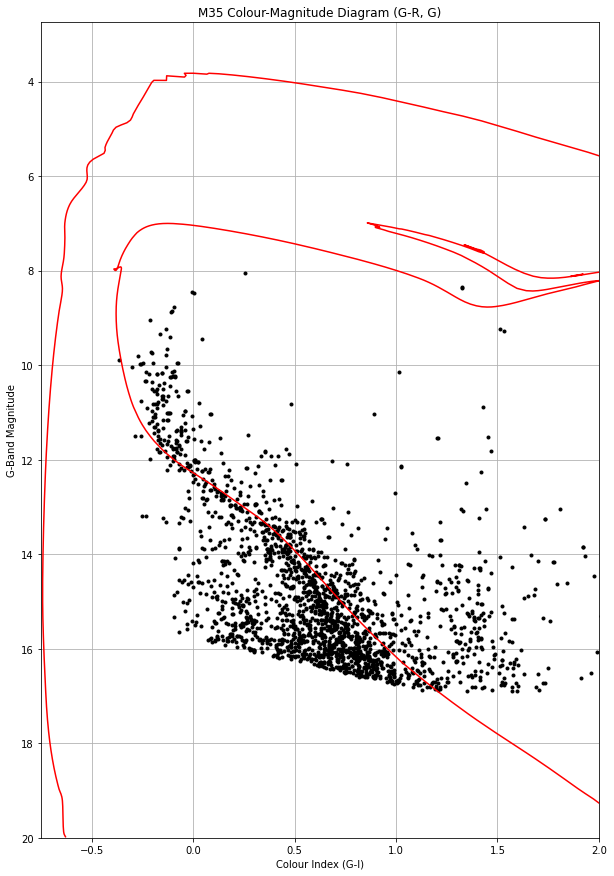

In [20]:
plt.figure(figsize=(10, 15))

# age_guess = 9.6621
# distance_mod_guess = 9.6926

age_guess = 7.990
distance_mod_guess = 10.2

Reddening = 0.27

plt.plot(G_I, G_mag, ".", color = "Black")

age_ind = isocmd.age_index(age_guess) # A guess at the cluster age, turning point, to be refined to fit data
G1 = isocmd.isocmds[age_ind]['SDSS_g']
R1 = isocmd.isocmds[age_ind]['SDSS_r']
I1 = isocmd.isocmds[age_ind]['SDSS_i']
plt.plot(G1-I1 + Reddening, G1 + distance_mod_guess, color = "Red", label = "Our best fit")# the distance modulus mu=m-M, scales the isochrone data from absolute to apparant magnitude and thus gives distance, a guess to be refined to fit data

plt.xlim(left = -0.75)
plt.xlim(right = 2)
plt.ylim(top = 20)
plt.xlabel("Colour Index (G-I)")
plt.ylabel("G-Band Magnitude")
plt.gca().invert_yaxis()
plt.title(cluster_dir + " " + "Colour-Magnitude Diagram (G-R, G)")
#plt.legend()
plt.grid()
plt.savefig(os.path.join(local_dir, "5. " + cluster_dir +  "_G-R vs G Colour-Mag.png"))

print("Age of Cluster (Gyr):",(10**(age_guess))/1000000000)
print("Distance (pc):", (10**((distance_mod_guess+5)/5)) )
print("Reddening(g' - i') is:", Reddening)

In [14]:
print((10**(8.05))/1000000000) #Billion year sold
print(10**((10.2+5)/5)) #Parsecs away

0.11220184543019653
1096.4781961431852
